# 1

In [64]:
import pandas as pd
df = pd.read_csv('/ihme/homes/edwin100/notebooks/repos/hw1/data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv')

In [65]:
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


# 2

In [66]:
df['total'] = df.apply(lambda row: row['Fremont Bridge East Sidewalk'] + row['Fremont Bridge West Sidewalk'], axis=1)
df['hour_of_day'] = df['Date'].str.slice(start=11, stop=13) + df['Date'].str.slice(start=20)

df['year'] = df['Date'].str.slice(start=6, stop=10).astype(int)

# 3

In [67]:
df_2016 = df[df['year']==2016]
df_2016.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total,hour_of_day,year
19680,12/31/2016 11:00:00 PM,4.0,4.0,8.0,11PM,2016
19681,12/31/2016 10:00:00 PM,7.0,8.0,15.0,10PM,2016
19682,12/31/2016 09:00:00 PM,4.0,6.0,10.0,09PM,2016
19683,12/31/2016 08:00:00 PM,3.0,6.0,9.0,08PM,2016
19684,12/31/2016 07:00:00 PM,6.0,4.0,10.0,07PM,2016


# 4

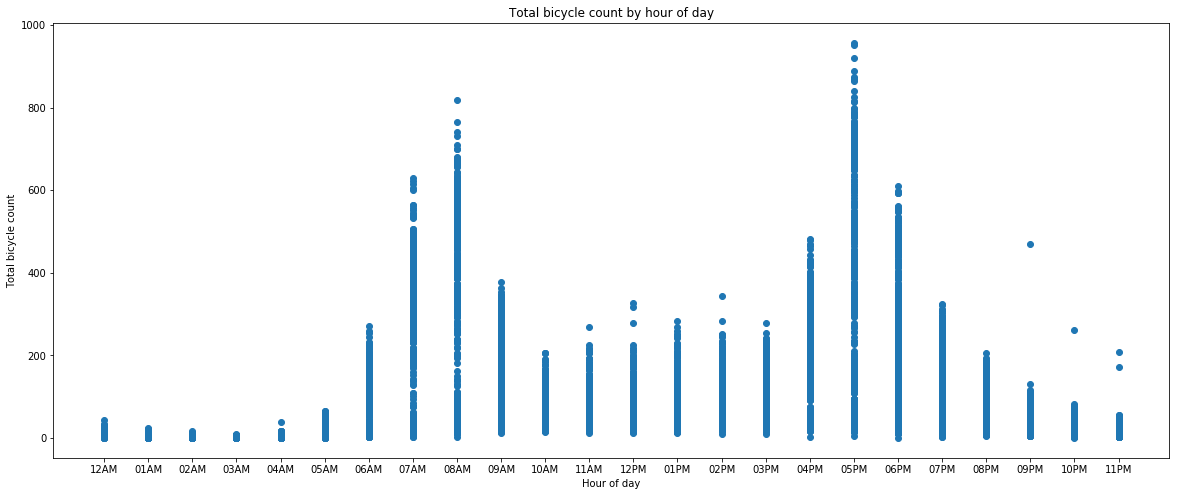

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 8))
plt.scatter(df_2016['hour_of_day'], df_2016['total'])
plt.title('Total bicycle count by hour of day')
plt.xlabel('Hour of day')
plt.ylabel('Total bicycle count')
# To reverse x axis
ax = plt.gca()
ax.invert_xaxis()
plt.show()

In [63]:
df_2016.describe()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total,year
count,8783.000000,8783.000000,8783.000000,8784.0
mean,53.319367,58.541045,111.860412,2016.0
std,71.804105,85.683035,144.584660,0.0
min,0.000000,0.000000,0.000000,2016.0
25%,6.000000,7.000000,14.000000,2016.0
50%,28.000000,29.000000,58.000000,2016.0
75%,68.000000,70.000000,141.000000,2016.0
max,560.000000,717.000000,957.000000,2016.0


# 5

Busiest hour of the day on average is observed to be 5 PM.

In [62]:
df_2016.groupby(['hour_of_day']).agg({'total':'mean'}).sort_values(by = 'total', ascending=False).index.values[0]

'05PM'